<a href="https://colab.research.google.com/github/Jehmary/Machine-Learning-Basics/blob/main/PCT04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Classification of Images of Balls**

####**Importing the Necessary Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import cv2 as cv
import fnmatch

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

####**Importing the Data**

Mounting Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Redirecting directory to "Balls" folder

In [5]:
%cd /content/gdrive/MyDrive/'Colab Notebooks'/Book/Balls

/content/gdrive/MyDrive/Colab Notebooks/Book/Balls


In [ ]:
ls

Randomizing data by shuffling

In [6]:
unshuffled_data = pd.DataFrame.from_dict(os.listdir())
shuffled_data   = unshuffled_data.sample(frac=1, random_state=1).reset_index()
data            = pd.DataFrame(shuffled_data)[0].values.tolist()

In [7]:
print(data)

['bowling19.jpg', 'billiards41.jpg', 'volleyball35.png', 'bowling41.jpg', 'tabletennis28.jpg', 'football23.png', 'tabletennis12.jpg', 'volleyball11.jpg', 'tabletennis34.png', 'basketball29.jpg', 'tabletennis27.jpg', 'tabletennis48.jpg', 'tennis50.jpg', 'billiards29.jpg', 'tennis49.png', 'billiards01.png', 'soccer50.jpg', 'baseball46.jpg', 'football19.jpg', 'tabletennis46.jpg', 'football25.jpg', 'basketball35.jpg', 'volleyball10.jpg', 'bowling04.jpg', 'football24.jpg', 'billiards44.jpg', 'football22.jpg', 'golf04.jpg', 'volleyball17.jpg', 'tabletennis40.png', 'baseball07.jpg', 'baseball36.png', 'billiards32.png', 'baseball30.png', 'tabletennis37.jpg', 'volleyball00.jpg', 'tabletennis09.jpg', 'football26.jpg', 'tabletennis15.jpg', 'football37.png', 'basketball43.jpg', 'basketball25.jpg', 'football39.jpg', 'basketball32.png', 'baseball29.jpg', 'golf20.jpg', 'tennis43.jpg', 'football50.png', 'volleyball37.jpeg', 'volleyball51.png', 'soccer04.jpg', 'tennis02.jpg', 'volleyball38.jpg', 'bowli

Reading image files and excluding those not rescaled to 28x28



In [9]:
m = 0
list_files = []
for file in data:
  image = cv.imread(file)
  if image.shape == (28,28,3):
    list_files.append(image)
  else:
    m += 1
print(str(m) + ' images were not rescaled to 28x28, hence excluded.')
# This code can read WEBP files

44 images were not rescaled to 28x28, hence excluded.


Verifying shape of image file and number of samples

In [10]:
print(list_files[0].shape)
print(len(list_files))

(28, 28, 3)
495


Data and plot of first image

[[[255 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


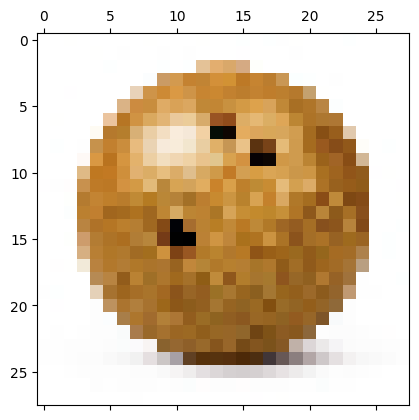

In [11]:
print(list_files[0])
plt.matshow(list_files[0])

Flattening the data

In [12]:
flat_files = np.stack((list_files[i] for i in range(len(list_files))))
print(flat_files.shape)

(495, 28, 28, 3)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


####**Adding labels to data sets**

In [13]:
# matching name of file to accounted file names for labelling
baseballXX    = 'baseball*'
basketballXX  = 'basketball*'
billiardsXX   = 'billiards*'
bowlingXX     = 'bowling*'
footballXX    = 'football*'
golfXX        = 'golf*'
soccerXX      = 'soccer*'
tabletennisXX = 'tabletennis*'
tennisXX      = 'tennis*'
volleyballXX  = 'volleyball*'
label         = []
for filename in data:
  image = cv.imread(filename)
  if image.shape == (28,28,3):
    if fnmatch.fnmatch(filename, baseballXX) == True:
      label.append(0)
    elif fnmatch.fnmatch(filename, basketballXX) == True:
      label.append(1)
    elif fnmatch.fnmatch(filename, billiardsXX) == True:
      label.append(2)
    elif fnmatch.fnmatch(filename, bowlingXX) == True:
      label.append(3)
    elif fnmatch.fnmatch(filename, footballXX) == True:
      label.append(4)
    elif fnmatch.fnmatch(filename, golfXX) == True:
      label.append(5)
    elif fnmatch.fnmatch(filename, soccerXX) == True:
      label.append(6)
    elif fnmatch.fnmatch(filename, tabletennisXX) == True:
      label.append(7)
    elif fnmatch.fnmatch(filename, tennisXX) == True:
      label.append(8)
    elif fnmatch.fnmatch(filename, volleyballXX) == True:
      label.append(9)
    else:
      print(filename + str(' is not accounted.'))

label = np.reshape(label, (len(label),))
print(label.shape)
print(label)

(495,)
[3 2 9 3 7 4 7 9 7 1 7 7 8 2 8 2 6 0 4 7 4 1 9 4 2 4 5 9 7 0 0 2 0 7 9 7 4
 7 4 1 1 4 1 0 5 8 4 9 9 6 8 3 1 7 4 2 1 5 8 6 1 7 2 1 0 7 8 0 5 1 1 2 6 5
 0 9 1 9 3 4 1 5 9 1 5 1 5 5 4 8 2 7 7 5 7 1 6 2 5 9 0 8 8 4 6 5 3 3 4 7 5
 6 7 8 7 0 6 9 0 1 3 8 3 1 6 0 2 1 1 2 8 8 4 0 6 8 3 3 9 9 5 6 0 2 3 1 0 0
 6 5 5 8 7 0 9 0 9 5 7 1 2 5 7 3 5 6 9 5 6 4 6 7 3 5 8 5 8 9 4 2 9 2 1 7 9
 9 5 7 0 0 8 0 1 1 9 6 1 9 5 8 4 7 7 2 6 5 2 4 2 3 5 8 3 2 3 1 2 5 2 6 9 4
 1 1 8 3 7 3 9 9 4 3 9 1 6 8 6 6 7 8 4 1 1 2 0 1 6 2 3 6 9 9 0 3 5 1 7 6 7
 9 0 3 5 6 0 9 5 3 9 3 6 5 4 6 7 0 3 5 2 3 8 4 0 2 6 2 1 1 0 0 8 1 8 9 1 0
 2 8 4 5 8 9 0 3 1 1 5 8 0 6 2 0 6 1 4 8 0 7 4 7 4 8 6 3 0 0 6 0 6 3 2 9 6
 4 9 7 2 4 9 4 5 3 8 8 6 1 5 4 4 5 6 8 3 3 7 2 7 6 3 8 3 4 6 2 8 4 5 6 5 2
 8 1 4 5 5 6 0 5 7 5 2 7 2 8 6 4 4 3 0 3 5 2 5 9 7 2 4 6 0 1 5 2 8 0 2 3 7
 3 5 4 9 8 0 2 5 2 1 6 2 5 9 9 9 0 4 8 8 2 1 7 4 7 7 9 6 3 0 3 0 9 2 7 7 6
 3 7 8 4 3 3 7 7 2 3 2 0 8 0 5 3 9 9 0 4 4 0 0 4 4 7 8 9 8 6 8 1 1 2 6 1 3
 3 6 2 8 1 6 7 3 0

####**Defining training data and testing data sets**

Allocating 80% of the data for training, 10% for validating, and 10% for testing.

In [14]:
trainRatio = 80/100
valRatio = 10/100
testRatio = 10/100

X_train, X_test, y_train, y_test = train_test_split(flat_files, label, test_size = 1 - trainRatio)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = testRatio/(testRatio + valRatio))

#####**Preparing the Data**

Rescaling the data to improve the accuracy

In [15]:
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

Shapes of the data sets

In [16]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(396, 28, 28, 3)
(50, 28, 28, 3)
(49, 28, 28, 3)


####**Defining the model**

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(495, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dropout (Dropout)           (None, 3200)              0

####**Compiling the model**

Using Adam as optimization function wiht a learning rate of 0.001.

In [18]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

####**Training the model**

In [19]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), verbose=1)

Epoch 1/500
13/13 [==============================] - 3s 115ms/step - loss: 2.2459 - accuracy: 0.1515 - val_loss: 1.9332 - val_accuracy: 0.3061
Epoch 2/500
13/13 [==============================] - 1s 89ms/step - loss: 1.7689 - accuracy: 0.3990 - val_loss: 1.5990 - val_accuracy: 0.4082
Epoch 3/500
13/13 [==============================] - 1s 89ms/step - loss: 1.4984 - accuracy: 0.4975 - val_loss: 1.4615 - val_accuracy: 0.5102
Epoch 4/500
13/13 [==============================] - 1s 88ms/step - loss: 1.2847 - accuracy: 0.5934 - val_loss: 1.3034 - val_accuracy: 0.5918
Epoch 5/500
13/13 [==============================] - 2s 136ms/step - loss: 1.0947 - accuracy: 0.6389 - val_loss: 1.3088 - val_accuracy: 0.5102
Epoch 6/500
13/13 [==============================] - 2s 158ms/step - loss: 1.0129 - accuracy: 0.6944 - val_loss: 1.1439 - val_accuracy: 0.6327
Epoch 7/500
13/13 [==============================] - 2s 116ms/step - loss: 0.9270 - accuracy: 0.6919 - val_loss: 1.4054 - val_accuracy: 0.5714
Ep

####**Evaluating the performance**

2/2 [==============================] - 0s 19ms/step - loss: 3.7871 - accuracy: 0.7400


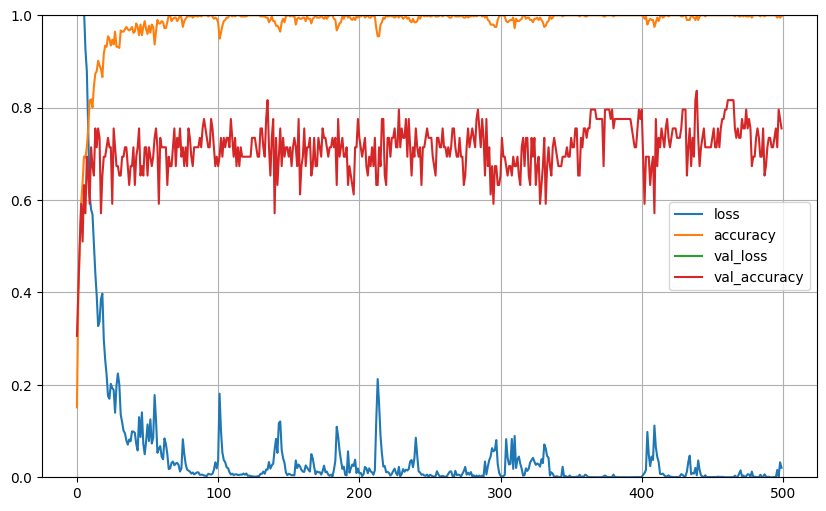

In [20]:
model.evaluate(X_test, y_test)

pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

2/2 [==============================] - 0s 22ms/step


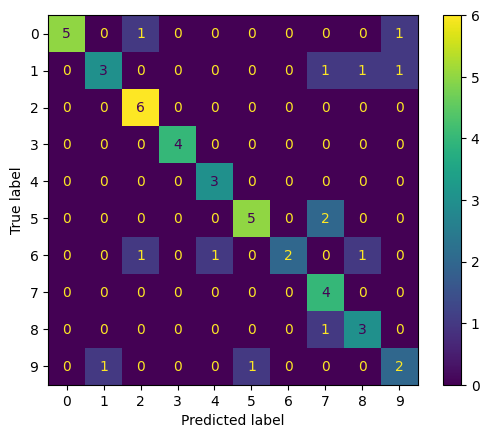

74.0


In [21]:
prediction = model.predict(X_test)
predicted_labels = [np.argmax(i) for i in prediction]

cm = confusion_matrix(y_test, prediction.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

accuracy = 100*np.trace(cm)/np.sum(cm)
print(accuracy)

Text(45.722222222222214, 0.5, 'True Label')

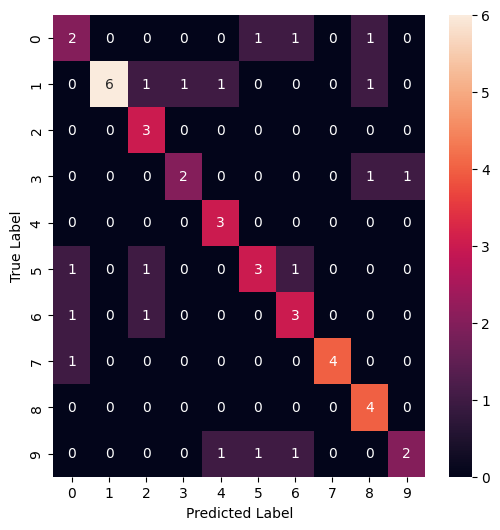

In [24]:
# Alternative Code for Displaying Confusion Matrix
import seaborn as sn
plt.figure(figsize = (6,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')